In [5]:
import numpy as np
import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [6]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("/Resources/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [7]:
cad_jpy_df


,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64
...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75
2020-06-01,79.27,78.21,79.36,78.04
2020-06-02,80.40,79.26,80.56,79.15


In [8]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [9]:
cad_jpy_df

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21
...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75
2020-06-01,79.27,78.21,79.36,78.04
2020-06-02,80.40,79.26,80.56,79.15


<AxesSubplot:xlabel='Date'>

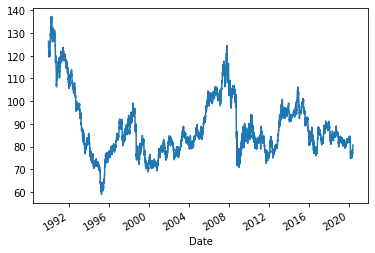

In [10]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot()

In [11]:
import statsmodels.api as sm
# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
cad_jpy_noise, cad_jpy_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])


In [12]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:

#drop columns not used
cad_jpy_df = cad_jpy_df.drop(columns=['Open','High','Low'])

In [13]:
cad_jpy_df

,Price
Date,
1990-01-02,126.37
1990-01-03,125.30
1990-01-04,123.46
1990-01-05,124.54
1990-01-08,124.27
...,...
2020-05-29,78.29
2020-06-01,79.27
2020-06-02,80.40


In [14]:
#add noise and trend from series
cad_jpy_df['noise'] = cad_jpy_noise
cad_jpy_df['trend'] = cad_jpy_trend

cad_jpy_df.head()
# YOUR CODE HERE!

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


In [15]:
#drop noise column for plot of price vs. trend
cad_jpy_df1 = cad_jpy_df.drop(columns=['noise'])

<AxesSubplot:xlabel='Date'>

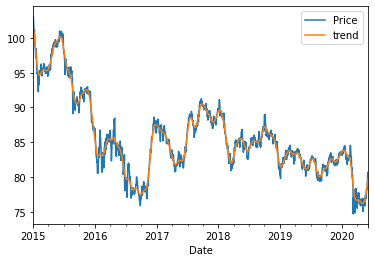

In [16]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
cad_jpy_df1.loc['2015':'2020'].plot()

<AxesSubplot:xlabel='Date'>

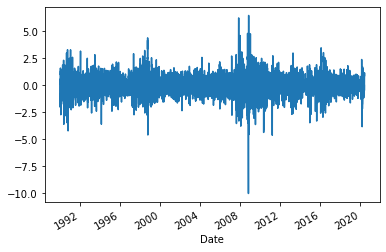

In [17]:
# Plot the Settle Noise
cad_jpy_df.noise.plot()

In [18]:
 # Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [19]:
import statsmodels.api as sm

# ARMA modelling to forecast Returns - it is OBSOLETE, so excluded from exercise
#
#
# Estimate and ARMA model using statsmodels (use order=(2, 1))
#
# *** used ARIMA, as ARMA model library not functioning in python, and set d=0

#from statsmodels.tsa.arima_model import ARIMA
#model = ARMA(returns.values, order=(2,1))






# Fit the model and assign it to a variable called result


In [3]:
# Plot the 5 Day Returns Forecast
#pd.DataFrame(result.forecast(steps=5)[0]).plot(title="5 day Returns Forecast")


In [20]:
#change dataframe to price only
price_df = cad_jpy_df1.drop(columns=['trend'])


In [21]:
price_df

,Price
Date,
1990-01-02,126.37
1990-01-03,125.30
1990-01-04,123.46
1990-01-05,124.54
1990-01-08,124.27
...,...
2020-05-29,78.29
2020-06-01,79.27
2020-06-02,80.40


In [22]:

#ARIMA modeling to forecast Exchange Rate Price
#
from statsmodels.tsa.arima.model import ARIMA


model_arima = ARIMA(cad_jpy_df1[['Price']], order=(5,1,1))

#
# Fit the model and assign it to a variable called results
# **NB - 'result' [no 's']->ARMA (analysis for returns), 'results'->ARIMA (analysis for price)
#
#
results = model_arima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.898
Date:                Fri, 05 Aug 2022   AIC                          17505.796
Time:                        17:50:43   BIC                          17554.643
Sample:                             0   HQIC                         17522.523
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4303      0.331      1.299      0.194      -0.219       1.080
ar.L2          0.0178      0.012      1.459      0.145      -0.006       0.042
ar.L3         -0.0117      0.009     -1.313      0.189      -0.029       0.006
ar.L4          0.0110      0.008      1.299      0.194      -0.006       0.028
ar.L5         -0.0191      0.007     -2.706      0.007      -0.033      -0.005
ma.L1         -0.4583      0.332     -1.381      0.167      -1.109       0.192
sigma2         0.5318      0.004    118.418      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9233.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
results.forecast(steps=5)

7929    80.704249
7930    80.692162
7931    80.668492
7932    80.652547
7933    80.645152
Name: predicted_mean, dtype: float64

<AxesSubplot:title={'center':'5 day Price Forecast'}>

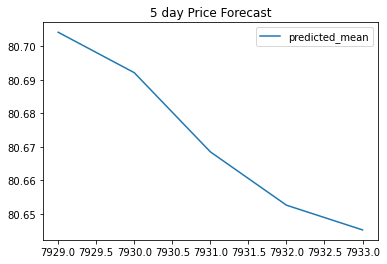

In [24]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)).plot(title="5 day Price Forecast")

In [100]:
#Volatility Forecasting with GARCH
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

In [101]:
 # Fit the GARCH Model
results_garch = model.fit(disp="on")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46548.40924082976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 306850859.3384427
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.838861417698
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11771.663036006626
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.31072801688
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.369930732108
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.112105819691
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027322298947
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.022077988246
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021067661106
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020797453917
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8911.020764880363
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8911.020764882265


In [102]:
# Summarize the model results
results_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Thu, Aug 04 2022   Df Residuals:                     7928
Time:                        13:01:59   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [103]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [105]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results_garch.forecast(start=last_day, horizon=forecast_horizon)



In [106]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [107]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

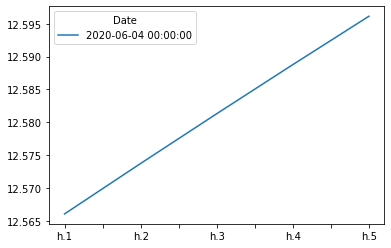

In [108]:
 # Plot the final forecast
final.plot()